### Data Preprocessing

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bbc_news.csv to bbc_news.csv


In [5]:
# Importing modules
import pandas as pd

papers = pd.read_csv('bbc_news.csv')# Print head
papers.head()

title  \
0  Ukraine: Angry Zelensky vows to punish Russian...   
1  War in Ukraine: Taking cover in a town under a...   
2         Ukraine war 'catastrophic for global food'   
3  Manchester Arena bombing: Saffie Roussos's par...   
4  Ukraine conflict: Oil price soars to highest l...   

                         pubDate  \
0  Mon, 07 Mar 2022 08:01:56 GMT   
1  Sun, 06 Mar 2022 22:49:58 GMT   
2  Mon, 07 Mar 2022 00:14:42 GMT   
3  Mon, 07 Mar 2022 00:05:40 GMT   
4  Mon, 07 Mar 2022 08:15:53 GMT   

                                               guid  \
0  https://www.bbc.co.uk/news/world-europe-60638042   
1  https://www.bbc.co.uk/news/world-europe-60641873   
2      https://www.bbc.co.uk/news/business-60623941   
3            https://www.bbc.co.uk/news/uk-60579079   
4      https://www.bbc.co.uk/news/business-60642786   

                                                link  \
0  https://www.bbc.co.uk/news/world-europe-606380...   
1  https://www.bbc.co.uk/news/world-europe-606418...   
2  https://www.bbc.co.uk/news/business-60623941?a...   
3  https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4  https://www.bbc.co.uk/news/business-60642786?a...   

                                         description  
0  The Ukrainian president says the country will ...  
1  Jeremy Bowen was on the frontline in Irpin, as...  
2  One of the world's biggest fertiliser firms sa...  
3  The parents of the Manchester Arena bombing's ...  
4  Consumers are feeling the impact of higher ene...

In [6]:
# Load the regular expression library
import re

# Remove punctuation
papers['description_processed'] = \
papers['description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['description_processed'] = \
papers['description_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['description_processed'].head()

0    the ukrainian president says the country will ...
1    jeremy bowen was on the frontline in irpin as ...
2    one of the world's biggest fertiliser firms sa...
3    the parents of the manchester arena bombing's ...
4    consumers are feeling the impact of higher ene...
Name: description_processed, dtype: object

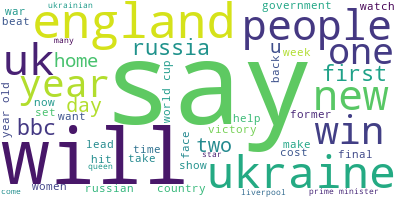

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['description_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


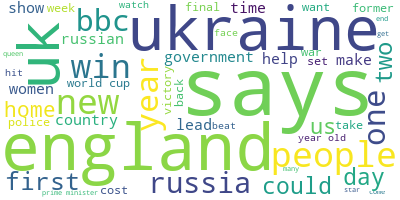

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')

# Create stopword list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['will', 'say', 'u'])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, stopwords=stop_words, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

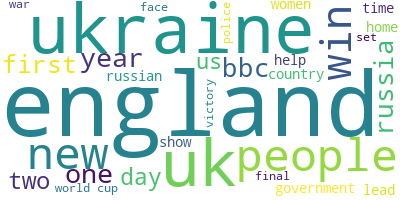

In [9]:
# Extend stopword list
stop_words.extend(['says', 'could', 'make', 'take'])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=30, stopwords=stop_words, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [12]:
def sent_to_words(sentences):
  for sentence in sentences:
    # deacc=True removes punctuations
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
      if word not in stop_words] for doc in texts]

data = papers.description_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[0])

['ukrainian', 'president', 'country', 'forgive', 'forget', 'murder', 'civilians']


### LDA

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)], [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(56, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)], [(1, 1), (78, 1), (81, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1)], [(6, 1), (15, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102,

In [ ]:
# Create LDA model
#lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                      id2word=id2word,
#                                       num_topics=10, 
#                                       random_state=100,
#                                       chunksize=100,
#                                       passes=10,
#                                       per_word_topics=True)

In [ ]:
#from gensim.models import CoherenceModel

# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()

# Compute Perplexity Score
#perplexity = lda_model.log_perplexity(corpus)

#print('Perplexity Score:', perplexity)
#print('Coherence Score: ', coherence_lda)

In [ ]:
from gensim.models import CoherenceModel
# Display the coherence score and perplexity score of different number of topics with lda model
def apply_lda(data_words, min_topics, max_topics):  
  # Apply the LDA model
  perplexity_dict = dict()
  coherence_dict = dict()
  lda_models_dict = dict()

  for num_topics in range(min_topics,max_topics+1):
    # Create LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                        id2word=id2word,
                        num_topics=10, 
                        random_state=100,
                        chunksize=100,
                        passes=10,
                        per_word_topics=True)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                       texts=data_words, 
                       dictionary=id2word, 
                       coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
        
    # Compute Perplexity Score
    perplexity = lda_model.log_perplexity(corpus)
        
    # Store values
    perplexity_dict[num_topics] = perplexity
    coherence_dict[num_topics] = coherence_lda
    lda_models_dict[num_topics] = lda_model

    print(f"Number of Topics: {num_topics} -- Perplexity: {perplexity} & Coherence Score: {coherence_lda}")
        
  # find the number of topics with maximum coherence score
  max_coherence_score = max(coherence_dict.values())
  max_coherence_num_topics = max(coherence_dict, key=coherence_dict.get)
  print(f"The number of topics with max coherence score({max_coherence_score}):{max_coherence_num_topics}")    

In [ ]:
apply_lda(data_words,2,30)

Number of Topics: 2 -- Perplexity: -9.903536780568588 & Coherence Score: 0.3858279518917276
Number of Topics: 3 -- Perplexity: -9.891754578996435 & Coherence Score: 0.3706335217616987
Number of Topics: 4 -- Perplexity: -9.882431399834779 & Coherence Score: 0.3783287790767786
Number of Topics: 5 -- Perplexity: -9.91157141872299 & Coherence Score: 0.3801995657192444
Number of Topics: 6 -- Perplexity: -9.876672924337585 & Coherence Score: 0.3610117280830251
Number of Topics: 7 -- Perplexity: -9.886621084490121 & Coherence Score: 0.38578899653409837
Number of Topics: 8 -- Perplexity: -9.917578146688642 & Coherence Score: 0.384048354264306
Number of Topics: 9 -- Perplexity: -9.902263915638603 & Coherence Score: 0.37119221185252665
Number of Topics: 10 -- Perplexity: -9.881297958566694 & Coherence Score: 0.38277248524967195
Number of Topics: 11 -- Perplexity: -9.891440928245656 & Coherence Score: 0.3719830979938794
Number of Topics: 12 -- Perplexity: -9.877365400198787 & Coherence Score: 0.3

In [ ]:
from pprint import pprint

# best number of topics
best_num_topics = 28

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=best_num_topics)

# Print the Keyword
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(18,
  '0.013*"people" + 0.011*"living" + 0.011*"cost" + 0.010*"charity" + '
  '0.009*"uk" + 0.007*"retail" + 0.007*"risk" + 0.007*"night" + 0.006*"crisis" '
  '+ 0.006*"home"'),
 (16,
  '0.013*"people" + 0.011*"since" + 0.009*"un" + 0.009*"first" + '
  '0.009*"supporters" + 0.008*"republican" + 0.008*"summit" + '
  '0.008*"president" + 0.007*"years" + 0.007*"would"'),
 (11,
  '0.010*"world" + 0.008*"online" + 0.008*"election" + 0.008*"saturday" + '
  '0.008*"time" + 0.008*"group" + 0.008*"americans" + 0.007*"touch" + '
  '0.007*"first" + 0.006*"reach"'),
 (22,
  '0.037*"cop" + 0.011*"across" + 0.010*"senate" + 0.008*"funeral" + '
  '0.007*"nursing" + 0.007*"democrats" + 0.007*"college" + 0.006*"royal" + '
  '0.006*"following" + 0.006*"uk"'),
 (24,
  '0.013*"world" + 0.012*"human" + 0.010*"recession" + 0.009*"cup" + '
  '0.007*"england" + 0.007*"one" + 0.007*"numbers" + 0.006*"promises" + '
  '0.006*"know" + 0.006*"fans"'),
 (2,
  '0.008*"budget" + 0.008*"november" + 0.008*"one" + 0.0

### NMF

In [ ]:
from gensim.corpora.dictionary import Dictionary
# Use Gensim's NMF to get the best num of topics via coherence score
texts = data_words

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=3,
             no_above=0.85,
             keep_n=5000)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
import numpy as np
!pip install -U gensim
from operator import itemgetter
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 50, 5))

# Run the nmf model and calculate the coherence score for each number of topics
coherence_scores = []

for num in topic_nums:
   nmf = Nmf(corpus=corpus,
         num_topics=num,
         id2word=dictionary,
         chunksize=2000,
         passes=5,
         kappa=.1,
         minimum_probability=0.01,
         w_max_iter=300,
         w_stop_condition=0.0001,
         h_max_iter=100,
         h_stop_condition=0.001,
         eval_every=10,
         normalize=True,
         random_state=42)
    
   # Run the coherence model to get the score
   cm = CoherenceModel(model=nmf,
              texts=texts,
              dictionary=dictionary,
              coherence='c_v')
    
   coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


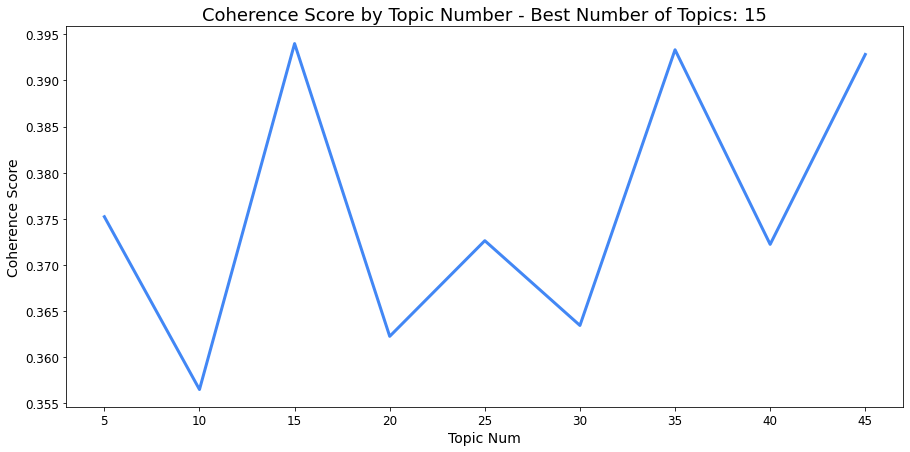

In [ ]:
import matplotlib.pyplot as plt
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(topic_nums,
     coherence_scores,
     linewidth=3,
     color='#4287f5')

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
# Now use the number of topics with the highest coherence score to run the sklearn nmf model
# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(min_df=3,
                   max_df=0.85,
                   max_features=5000,
                   ngram_range=(1,2),
                   preprocessor=' '.join)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(n_components=best_num_topics,
      init='nndsvd',
      max_iter=500,
      l1_ratio=0.0,
      solver='cd',
      alpha=0.0,
      tol=1e-4,
      random_state=42).fit(tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
from gensim.models.nmf import Nmf
from nltk.tokenize import TweetTokenizer, RegexpTokenizer

def top_words(topic, n_top_words):
  return topic.argsort()[:-n_top_words - 1:-1]  


def topic_table(model, feature_names, n_top_words):
  topics = {}
  for topic_idx, topic in enumerate(model.components_):
    t = (topic_idx)
    topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
  return pd.DataFrame(topics)


def whitespace_tokenizer(text): 
  pattern = r"(?u)\b\w\w+\b" 
  tokenizer_regex = RegexpTokenizer(pattern)
  tokens = tokenizer_regex.tokenize(text)
  return tokens


# Funtion to remove duplicate words
def unique_words(text): 
  ulist = []
  [ulist.append(x) for x in text if x not in ulist]
  return ulist


def word_count(text):
  return len(str(text).split(' '))

# Use the top words for each cluster by tfidf weight to create 'topics'
# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(nmf,
            tfidf_fn,
            n_top_words).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


0           1                   2                3  \
0        england         one                test            south   
1        ukraine      russia             russian              war   
2           days  seven days          past seven            seven   
3       minister       prime      prime minister            truss   
4           year         old            year old           police   
5     manchester        city              united  manchester city   
6         league   champions    champions league          premier   
7          world         cup           world cup           around   
8            bbc       sport               tells        bbc sport   
9         people      living                cost      cost living   
10  commonwealth       games  commonwealth games              day   
11         queen   elizabeth     queen elizabeth               ii   
12         first        time               years       first time   
13       johnson       boris       boris johnson           papers   
14            uk  government                 new           energy   

                    4                 5               6           7  \
0              africa              euro    south africa         new   
1            invasion  invasion ukraine       president   ukrainian   
2                past  paying attention  closely paying  going past   
3                 liz         liz truss            next         mps   
4                 man             three            died        last   
5   manchester united         liverpool           match   match day   
6      premier league             final       liverpool      madrid   
7        around world             wales           rugby       final   
8           tells bbc              news           looks         one   
9              crisis     living crisis           young     million   
10         birmingham  games birmingham            gold       watch   
11       elizabeth ii             death           state     funeral   
12                 us             since            open         two   
13               lead             sunak            tory       rishi   
14               many             bills          across       cases   

                                               topics  
0              england one test south africa euro new  
1   ukraine russia russian war invasion president ...  
2      days seven past paying attention closely going  
3                   minister prime truss liz next mps  
4                 year old police man three died last  
5          manchester city united liverpool match day  
6     league champions premier final liverpool madrid  
7                  world cup around wales rugby final  
8                      bbc sport tells news looks one  
9             people living cost crisis young million  
10       commonwealth games day birmingham gold watch  
11             queen elizabeth ii death state funeral  
12                 first time years us since open two  
13         johnson boris papers lead sunak tory rishi  
14   uk government new energy many bills across cases

### BTM

In [ ]:
!pip install bitermplus
!pip install tmplot
import bitermplus as btm
import tmplot as tmp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Apply BTM model
def apply_BTM(data_words, min_topic=2,max_topic=5):
  texts = [" ".join(i) for i in data_words]
  X, vocabulary, vocab_dict = btm.get_words_freqs(texts, stop_words=stop_words)
  docs_vec = btm.get_vectorized_docs(texts, vocabulary)
  biterms = btm.get_biterms(docs_vec)

  perplexity_dict = dict()
  coherence_dict = dict()
  BTM_model_dict = dict()
  #phi_dict = dict()

  for num_topics in range(min_topic, max_topic+1):
    # Initializing and running model
    model = btm.BTM(X, vocabulary, T=num_topics)
    model.fit(biterms, iterations=20, verbose=False)
    p_zd = model.transform(docs_vec)

    perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 8)
    coherence = np.average(btm.coherence(model.matrix_topics_words_, X, M=20))
    #perplexity = model.perplexity_
    #coherence = np.average(model.coherence_)

    print(f"Number of Topics: {num_topics} -- Perplexity: {perplexity} & Coherence Score: {coherence}")

    phi = tmp.get_phi(model)
    perplexity_dict[num_topics] = perplexity
    coherence_dict[num_topics] = coherence
    BTM_model_dict[num_topics] = model
    #phi_dict[num_topics] = phi

  max_coherence_score = max(coherence_dict.values())
  max_coherence_num_topics = max(coherence_dict, key=coherence_dict.get)
  print(f"The number of topics with max coherence score({max_coherence_score}):{max_coherence_num_topics}") 

In [ ]:
apply_BTM(data_words,2,30)

100%|██████████| 10364/10364 [00:00<00:00, 145426.15it/s]


Number of Topics: 2 -- Perplexity: 3322.6860880604195 & Coherence Score: -640.1339983023461


/usr/local/lib/python3.7/dist-packages/tmplot/_helpers.py:39: UserWarning: Please install "tomotopy" package to analyze its models.
Run `pip install tomotopy` in the console.
  f'Please install "{package_name}" package to analyze its models.\n'
100%|██████████| 10364/10364 [00:00<00:00, 149531.20it/s]


Number of Topics: 3 -- Perplexity: 2.8369348284059686 & Coherence Score: -659.6142502554491


100%|██████████| 10364/10364 [00:00<00:00, 141148.90it/s]


Number of Topics: 4 -- Perplexity: 1.5676567899731127e-05 & Coherence Score: -651.9695518739115


100%|██████████| 10364/10364 [00:00<00:00, 136073.07it/s]


Number of Topics: 5 -- Perplexity: 2448.2442698050736 & Coherence Score: -638.2045406979765


100%|██████████| 10364/10364 [00:00<00:00, 128813.43it/s]


Number of Topics: 6 -- Perplexity: 2296.9847818405074 & Coherence Score: -649.651632654122


100%|██████████| 10364/10364 [00:00<00:00, 119542.64it/s]


Number of Topics: 7 -- Perplexity: 184.40002911321216 & Coherence Score: -643.5679343364726


100%|██████████| 10364/10364 [00:00<00:00, 117982.34it/s]


Number of Topics: 8 -- Perplexity: 2095.7173989022544 & Coherence Score: -655.0651023032278


100%|██████████| 10364/10364 [00:00<00:00, 112075.34it/s]


Number of Topics: 9 -- Perplexity: 2692.847640816265 & Coherence Score: -660.1359799288001


100%|██████████| 10364/10364 [00:00<00:00, 110235.63it/s]


Number of Topics: 10 -- Perplexity: 4132.487179721377 & Coherence Score: -647.0018276986214


100%|██████████| 10364/10364 [00:00<00:00, 94100.18it/s]


Number of Topics: 11 -- Perplexity: 3282.280341280271 & Coherence Score: -637.3194760446385


100%|██████████| 10364/10364 [00:00<00:00, 99768.35it/s] 


Number of Topics: 12 -- Perplexity: 4852.176652062608 & Coherence Score: -645.7479313165416


100%|██████████| 10364/10364 [00:00<00:00, 89125.97it/s]


Number of Topics: 13 -- Perplexity: 5220.381327628122 & Coherence Score: -649.0709125396747


100%|██████████| 10364/10364 [00:00<00:00, 90352.70it/s]


Number of Topics: 14 -- Perplexity: 6248.770503467209 & Coherence Score: -667.5323224171352


100%|██████████| 10364/10364 [00:00<00:00, 85835.86it/s]


Number of Topics: 15 -- Perplexity: 8312.727553107448 & Coherence Score: -651.5058104653867


100%|██████████| 10364/10364 [00:00<00:00, 84038.52it/s]


Number of Topics: 16 -- Perplexity: 7784.391298246979 & Coherence Score: -645.7673439762399


100%|██████████| 10364/10364 [00:00<00:00, 84312.52it/s]


Number of Topics: 17 -- Perplexity: 9820.790677970406 & Coherence Score: -648.2183732209285


100%|██████████| 10364/10364 [00:00<00:00, 77398.06it/s]


Number of Topics: 18 -- Perplexity: 9865.915622225162 & Coherence Score: -654.4215141363371


100%|██████████| 10364/10364 [00:00<00:00, 71021.95it/s]


Number of Topics: 19 -- Perplexity: 9985.915866984269 & Coherence Score: -634.5174421101084


100%|██████████| 10364/10364 [00:00<00:00, 74656.46it/s]


Number of Topics: 20 -- Perplexity: 11163.248712824186 & Coherence Score: -656.1045212438613


100%|██████████| 10364/10364 [00:00<00:00, 74322.41it/s]


Number of Topics: 21 -- Perplexity: 17179.239811218267 & Coherence Score: -648.6923878486363


100%|██████████| 10364/10364 [00:00<00:00, 48654.27it/s]


Number of Topics: 22 -- Perplexity: 16587.129496817535 & Coherence Score: -657.5110350867097


100%|██████████| 10364/10364 [00:00<00:00, 66950.11it/s]


Number of Topics: 23 -- Perplexity: 19604.916601721332 & Coherence Score: -662.0448600742775


100%|██████████| 10364/10364 [00:00<00:00, 67292.43it/s]


Number of Topics: 24 -- Perplexity: 17872.996070355915 & Coherence Score: -645.4918054196053


100%|██████████| 10364/10364 [00:00<00:00, 62614.54it/s]


Number of Topics: 25 -- Perplexity: 25066.24618898474 & Coherence Score: -650.8431958284652


100%|██████████| 10364/10364 [00:00<00:00, 62655.69it/s]


Number of Topics: 26 -- Perplexity: 23768.30013284636 & Coherence Score: -655.0050536230708


100%|██████████| 10364/10364 [00:00<00:00, 61151.81it/s]


Number of Topics: 27 -- Perplexity: 22212.59460057332 & Coherence Score: -647.4292914290827


100%|██████████| 10364/10364 [00:00<00:00, 64331.32it/s]


Number of Topics: 28 -- Perplexity: 25202.42711050351 & Coherence Score: -665.0604759172822


100%|██████████| 10364/10364 [00:00<00:00, 61326.86it/s]


Number of Topics: 29 -- Perplexity: 23941.551271805703 & Coherence Score: -652.2356604987602


100%|██████████| 10364/10364 [00:00<00:00, 58838.90it/s]


Number of Topics: 30 -- Perplexity: 29009.964128465494 & Coherence Score: -648.3456096379424
The number of topics with max coherence score(-634.5174421101084):19


In [ ]:
# Run the BTM model with best topic number
texts = [" ".join(i) for i in data_words]
X, vocabulary, vocab_dict = btm.get_words_freqs(texts, stop_words=stop_words)
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
biterms = btm.get_biterms(docs_vec)

model = btm.BTM(X, vocabulary, T=19)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)

btm.get_docs_top_topic(texts, model.matrix_docs_topics_)

100%|██████████| 10364/10364 [00:00<00:00, 78716.35it/s]


documents  label
0      ukrainian president country forgive forget mur...     18
1      jeremy bowen frontline irpin residents came ru...     18
2      one world biggest fertiliser firms conflict de...      9
3      parents manchester arena bombing youngest vict...     12
4      consumers feeling impact higher energy costs f...     15
...                                                  ...    ...
10359  premier league takes world cup break bbc sport...     11
10360  neil robertson john higgins beaten another day...     11
10361  watch highlights ben stokes sam curran adil ra...      5
10362  scotland fail end year wait first ever win new...      5
10363  england centre tara jane stanley longer starst...     17

[10364 rows x 2 columns]

### CoRex

In [ ]:
!pip install corextopic
import numpy as np
import scipy.sparse as ss
from corextopic import corextopic as ct
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Apply CoRex model
def apply_CoRex(data_words, min_topic, max_topic):
  tc_dict = dict()
  model_dict = dict()

  vect = CountVectorizer(stop_words=stop_words,analyzer='word', ngram_range=(1,1), min_df = 0.01)
  X = vect.fit_transform([" ".join(i) for i in data_words])
  X = ss.csr_matrix(X)
    
  for num_topic in range(min_topic, max_topic+1):
    # Train the CorEx topic model
    model = ct.Corex(n_hidden=num_topic)
    # topic_model.fit(X, words=words, docs=docs)
    words = vect.get_feature_names()
    model.fit(X, words=words)
    print(f"Topic {num_topic} -- Total Covraiance: {model.tc}")
    
    tc_dict[num_topic] = model.tc
    model_dict[num_topic] = model

  max_covariance_score = max(tc_dict.values())
  max_covariance_num_topics = max(tc_dict, key=tc_dict.get)
  print(f"The number of topics with max coherence score({max_covariance_score}):{max_covariance_num_topics}") 

In [ ]:
apply_CoRex(data_words,2,30)

Topic 2 -- Total Covraiance: 0.5210141147916146
Topic 3 -- Total Covraiance: 0.46621755413702687
Topic 4 -- Total Covraiance: 0.4344505494322439
Topic 5 -- Total Covraiance: 0.5439318670701047
Topic 6 -- Total Covraiance: 0.5845485664547188
Topic 7 -- Total Covraiance: 0.5714950696695311
Topic 8 -- Total Covraiance: 0.5877881765300108
Topic 9 -- Total Covraiance: 0.567455855533828
Topic 10 -- Total Covraiance: 0.6157809835180731
Topic 11 -- Total Covraiance: 0.6765847363808905
Topic 12 -- Total Covraiance: 0.5889526718394957
Topic 13 -- Total Covraiance: 0.59070387091204
Topic 14 -- Total Covraiance: 0.614469262338072
Topic 15 -- Total Covraiance: 0.6006190657630285
Topic 16 -- Total Covraiance: 0.5835841231163086
Topic 17 -- Total Covraiance: 0.6191634285228321
Topic 18 -- Total Covraiance: 0.5501477188625788
Topic 19 -- Total Covraiance: 0.6937618545495704
Topic 20 -- Total Covraiance: 0.6122771518659366
Topic 21 -- Total Covraiance: 0.558039000207146
Topic 22 -- Total Covraiance: 0.

In [ ]:
# Run the CoRex model with best topic number
vect = CountVectorizer(stop_words=stop_words,analyzer='word', ngram_range=(1,1), min_df = 0.01)
X = vect.fit_transform([" ".join(i) for i in data_words])
X = ss.csr_matrix(X)

model = ct.Corex(n_hidden=19)
words = vect.get_feature_names()
model.fit(X, words=words)

for topic_idx,topic in enumerate(model.get_topics()):
  # w: word, mi: mutual information, s: sign
  topic = [w if s > 0 else ('~'+w) for w,_,s in topic]
  results = ", ".join(topic[:8])
  print(f"Topic {topic_idx}: {results}")

Topic 0: league, final, win, manchester, champions, cup, premier, united
Topic 1: minister, prime, johnson, boris, papers, lead, truss, pm
Topic 2: ukraine, russia, war, russian, ukrainian, ~queen
Topic 3: past, seven, days
Topic 4: england, world, test, women, wales, south, around, men
Topic 5: living, cost, rising, help, ~week
Topic 6: year, old, man, ~get
Topic 7: first, time, since, open, us
Topic 8: bbc, sport
Topic 9: city, top, season, chelsea, four, ~uk, west, ~covid
Topic 10: years, two, five, three, star
Topic 11: people, ~end, thousands, left, ~sunday
Topic 12: show, died, hit, children, home, ~would
Topic 13: president, country, said, may
Topic 14: government, pay
Topic 15: last, ~across, back
Topic 16: group, ~state
Topic 17: former, british
Topic 18: many
